In [ ]:
import tensorflow as tf
import numpy as np

# Download the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape the input data
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)

# Create an ImageDataGenerator object
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# Fit the ImageDataGenerator to the training data
datagen.fit(x_train)

# Use this for generating augmented data on-the-fly during training
train_generator = datagen.flow(x_train, y_train, batch_size=32)

# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_generator, epochs=10)

# Evaluate the model
x_test_reshaped = x_test.reshape(x_test.shape[0], 28, 28, 1)  # reshape the x_test
loss, accuracy = model.evaluate(x_test_reshaped, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

# Confusion matrix
predictions = model.predict(x_test_reshaped)
predicted_labels = np.argmax(predictions, axis=1)
confusion_matrix = tf.math.confusion_matrix(y_test, predicted_labels)
print(confusion_matrix)

Epoch 1/10
1875/1875 [==============================] - 41s 22ms/step - loss: 3.6265 - accuracy: 0.2675
Epoch 2/10
1875/1875 [==============================] - 27s 15ms/step - loss: 1.6165 - accuracy: 0.4322
Epoch 3/10
1875/1875 [==============================] - 27s 14ms/step - loss: 1.3864 - accuracy: 0.5243
Epoch 4/10
1875/1875 [==============================] - 28s 15ms/step - loss: 1.3030 - accuracy: 0.5631
Epoch 5/10
1875/1875 [==============================] - 29s 15ms/step - loss: 1.2626 - accuracy: 0.5745
Epoch 6/10
1875/1875 [==============================] - 28s 15ms/step - loss: 1.2454 - accuracy: 0.5827
Epoch 7/10
1875/1875 [==============================] - 27s 14ms/step - loss: 1.2447 - accuracy: 0.5750
Epoch 8/10
1875/1875 [==============================] - 27s 14ms/step - loss: 1.2326 - accuracy: 0.5852
Epoch 9/10
1875/1875 [==============================] - 27s 15ms/step - loss: 1.2203 - accuracy: 0.5932
Epoch 10/10
313/313 [==============================] - 1s 2ms/st

Epoch 1/5
1875/1875 [==============================] - 28s 15ms/step - loss: 1.1882 - accuracy: 0.6074 - val_loss: 0.7069 - val_accuracy: 0.7926
Epoch 2/5
1875/1875 [==============================] - 29s 15ms/step - loss: 1.1754 - accuracy: 0.6114 - val_loss: 0.7149 - val_accuracy: 0.7939
Epoch 3/5
1875/1875 [==============================] - 29s 15ms/step - loss: 1.1794 - accuracy: 0.6109 - val_loss: 0.8278 - val_accuracy: 0.7547
Epoch 4/5
1875/1875 [==============================] - 30s 16ms/step - loss: 1.1802 - accuracy: 0.6096 - val_loss: 0.7768 - val_accuracy: 0.7716
Epoch 5/5
1875/1875 [==============================] - 31s 16ms/step - loss: 1.1649 - accuracy: 0.6162 - val_loss: 0.6833 - val_accuracy: 0.8059


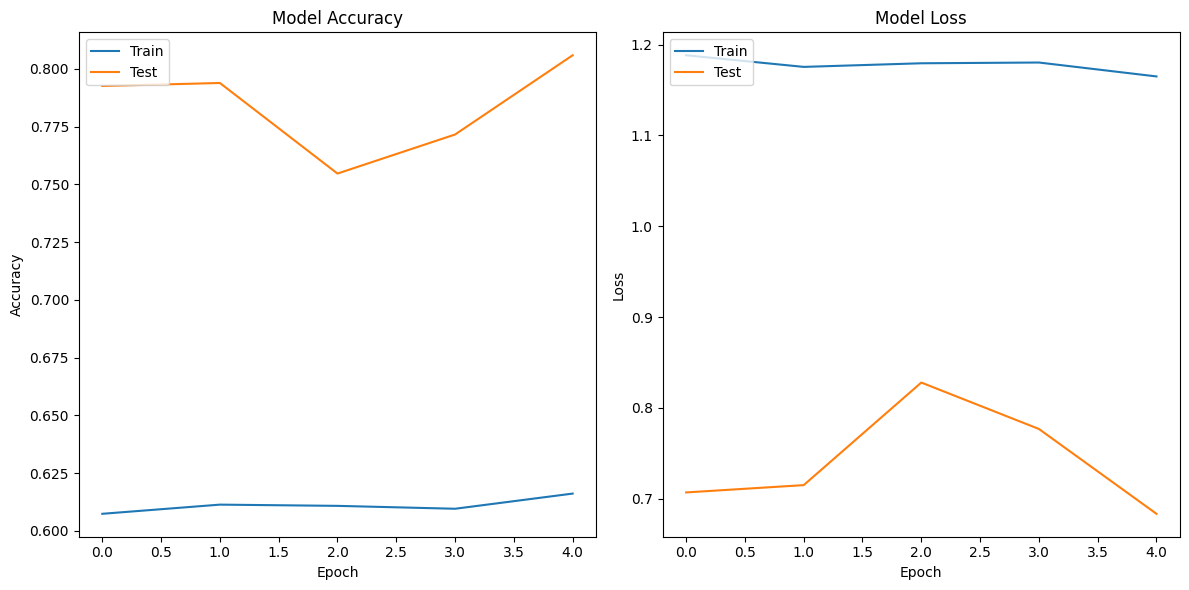

TypeError: ignored

In [ ]:



# Plot accuracy and loss
history = model.fit(train_generator, epochs=5, validation_data=(x_test_reshaped, y_test))

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

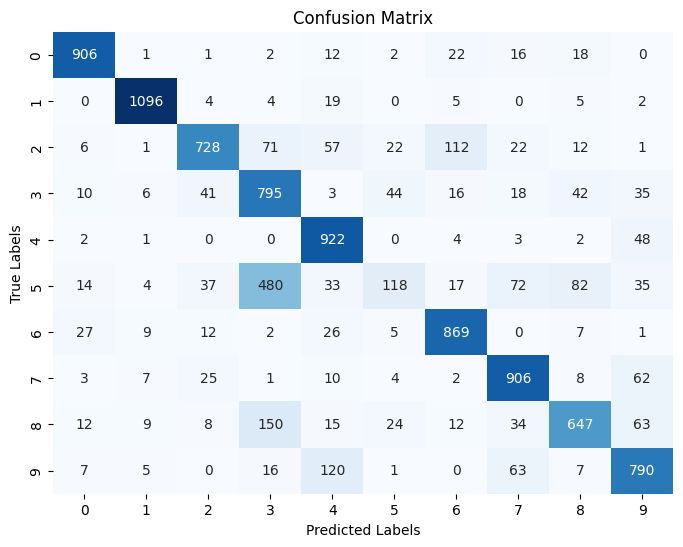

In [ ]:

import seaborn as sns
# Confusion matrix using TensorFlow
confusion_matrix = tf.math.confusion_matrix(y_test, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()